In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Funciones auxiliares generales
def filtrar_outliers(df, columna, p_inf=0.01, p_sup=0.99):
    """Filtra valores extremos de una columna numérica usando percentiles."""
    lim_inf = df[columna].quantile(p_inf)
    lim_sup = df[columna].quantile(p_sup)
    return df[df[columna].between(lim_inf, lim_sup)]

# Cargar y preparar los datos
def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
    df["gluc"] = (df["gluc"] > 1).astype(int)
    df["age_years"] = (df["age"] / 365).astype(int)
    return df

def agregar_bmi(df):
    """Calcula el IMC y agrega las columnas 'BMI' e 'overweight' al DataFrame."""
    bmi = df["weight"] / ((df["height"] / 100) ** 2)
    df["BMI"] = bmi
    df["overweight"] = (bmi > 25).astype(int)
    return df


In [3]:
ruta = "C:/Users/trezz/Desktop/proyectosDeDesarrolloWeb/MedicalExamination/data/medical_examination.csv"
df = cargar_datos(ruta)
df = agregar_bmi(df)
df_bmi = filtrar_outliers(df, "BMI")

# Visualización clínica con relplot (BMI)

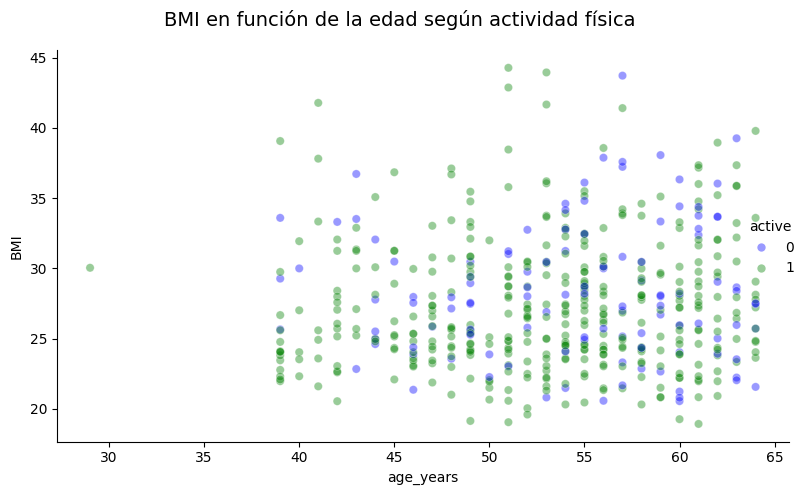

In [10]:
# relplot - scatterplot 
def relplot_imc_vs_edad_por_actividad(df, max_muestras=500):
    """
    Visualiza la relación entre edad e IMC, diferenciando por nivel de actividad física.
    Aplica filtrado clínico de outliers en BMI y limita cantidad de muestras si se especifica.
    """
    df_filtrado = filtrar_outliers(df, "BMI")  # Filtra valores extremos de IMC

    # Limitar cantidad de muestras si se especifica
    if max_muestras is not None and len(df_filtrado) > max_muestras:
        df_filtrado = df_filtrado.sample(max_muestras, random_state=42)

    sns.relplot(
        data=df_filtrado,
        x="age_years",
        y="BMI",
        hue="active",         # 0: inactivo, 1: activo
        kind="scatter",
        alpha=0.4,
        palette={0: "blue", 1: "green"},
        height=5,
        aspect=1.5
    )
    plt.suptitle("BMI en función de la edad según actividad física", fontsize=14)
    plt.tight_layout()
    plt.show()
    plt.close()

relplot_imc_vs_edad_por_actividad(df, max_muestras=500)


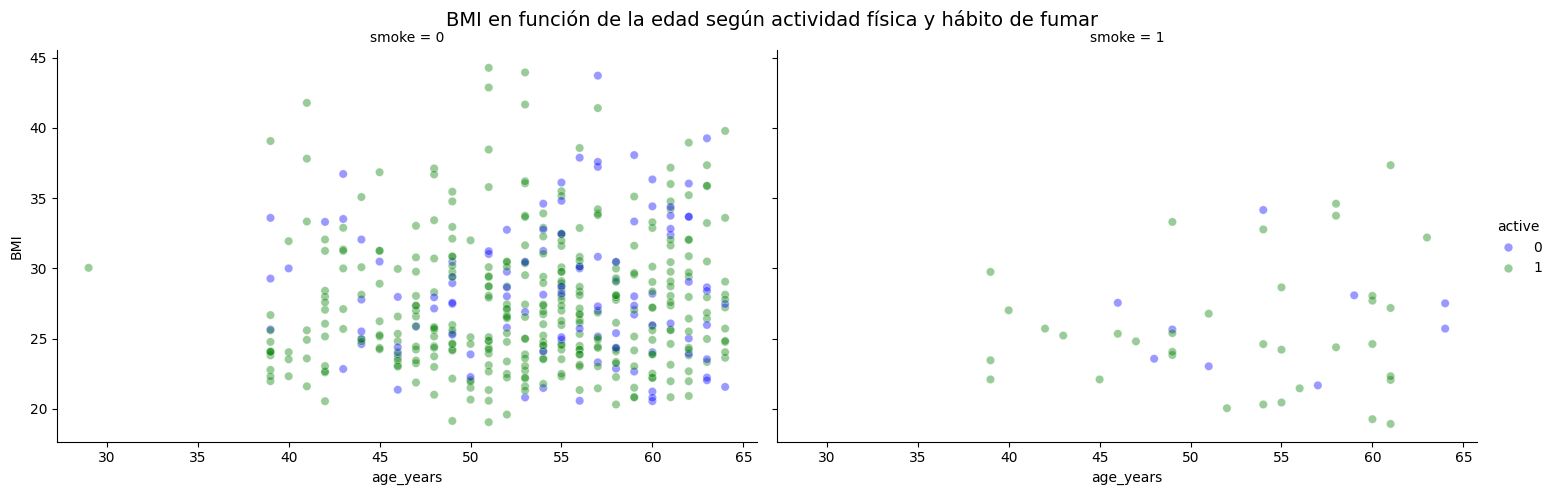

In [11]:
def relplot_imc_vs_edad_por_actividad_smoke(df, max_muestras=500):
    """
    Visualiza la relación entre edad e IMC, diferenciando por nivel de actividad física y hábito de fumar.
    Aplica filtrado clínico de outliers en BMI y limita cantidad de muestras si se especifica.
    """
    df_filtrado = filtrar_outliers(df, "BMI")  # Filtra valores extremos de IMC

    # Limitar cantidad de muestras si se especifica
    if max_muestras is not None and len(df_filtrado) > max_muestras:
        df_filtrado = df_filtrado.sample(max_muestras, random_state=42)

    g = sns.relplot(
        data=df_filtrado,
        x="age_years",
        y="BMI",
        hue="active",         # 0: inactivo, 1: activo
        kind="scatter",
        alpha=0.4,
        palette={0: "blue", 1: "green"},
        height=5,
        aspect=1.5,
        col="smoke"           # Divide en dos gráficos: no fumadores vs fumadores
    )

    # Título general y ajuste de layout
    g.fig.suptitle("BMI en función de la edad según actividad física y hábito de fumar", fontsize=14)
    g.fig.subplots_adjust(top=0.9)  # Deja espacio para el título
    plt.show()
    plt.close()

relplot_imc_vs_edad_por_actividad_smoke(df, max_muestras=500)

In [6]:
# relplot - lineplot
def relplot_presion_vs_edad_por_actividad(df):
   
    # Agrupar por edad y actividad física, y calcular promedio de presión sistólica
    df_line = df.groupby(["age_years", "active"], observed=True)["ap_hi"].mean().reset_index()

    # Gráfico de líneas
    sns.relplot(
        data=df_line,
        x="age_years",
        y="ap_hi",
        hue="active",         # 0: inactivo, 1: activo
        kind="line",
        marker="o",
        palette={0: "blue", 1: "green"},
        height=5,
        aspect=1.5
    )
    plt.suptitle("Presión sistólica promedio por edad según actividad física", fontsize=14)
    plt.xlabel("Edad (años)")
    plt.ylabel("Presión sistólica (mmHg)")
    plt.tight_layout()
    plt.show()
    plt.close()



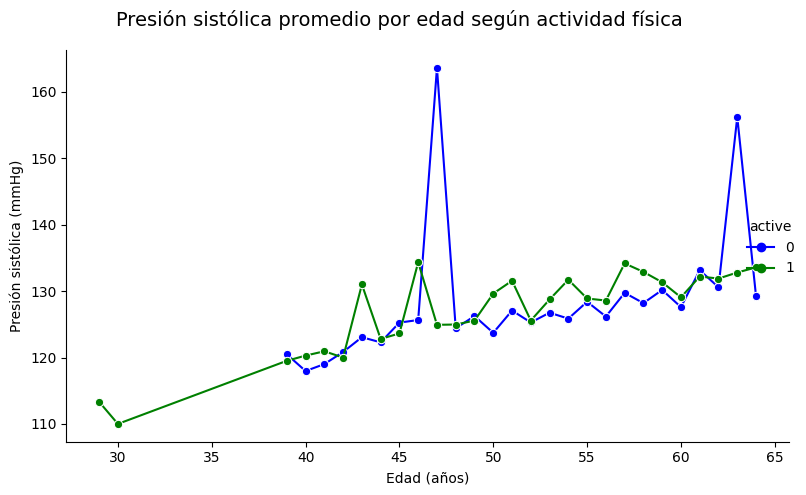

In [7]:
relplot_presion_vs_edad_por_actividad(df)

# Visualización clínica con displot (BMI)

In [8]:
def displot_bmi_hist(df):
    """
    Histograma clínico de BMI con filtrado de outliers.
    """
    df_filtrado = filtrar_outliers(df, "BMI")
    sns.displot(data=df_filtrado, x="BMI", bins=20, kde=True, color="mediumseagreen")
    plt.title("Distribución de IMC (histograma)")
    plt.xlabel("IMC")
    plt.ylabel("Cantidad de pacientes")
    plt.tight_layout()
    plt.show()
    plt.close()

def displot_bmi_hist_active(df):
    """
    Histogramas clínicos de BMI por nivel de actividad física, con filtrado de outliers.
    """
    df_filtrado = filtrar_outliers(df, "BMI")

    g = sns.displot(
        data=df_filtrado,
        x="BMI",
        bins=20,
        kde=True,
        color="purple",
        col="active",        # Divide en dos gráficos: inactivos vs activos
        height=4,
        aspect=1.2
    )

    # Título general y ajuste de layout
    g.fig.suptitle("Distribución de IMC por nivel de actividad física", fontsize=14)
    g.fig.subplots_adjust(top=0.85)


def displot_bmi_kde(df):
    """
    Curva de densidad (KDE) de BMI con filtrado de outliers.
    """
    df_filtrado = filtrar_outliers(df, "BMI")
    sns.displot(data=df_filtrado, x="BMI", kind="kde", rug=True ,fill=True, color="steelblue")
    plt.title("Distribución de IMC (KDE)")
    plt.xlabel("IMC")
    plt.tight_layout()
    plt.show()
    plt.close()

def displot_bmi_ecdf(df):
    """
    Distribución acumulada (ECDF) de BMI con filtrado de outliers.
    """
    df_filtrado = filtrar_outliers(df, "BMI")

    g = sns.displot(
        data=df_filtrado,
        x="BMI",
        kind="ecdf",
        color="darkorange",
        height=4,
        aspect=1.5
    )

    # Título general y ajuste de layout
    g.fig.suptitle("Distribución acumulada de IMC (ECDF)", fontsize=14)
    g.fig.subplots_adjust(top=0.9)




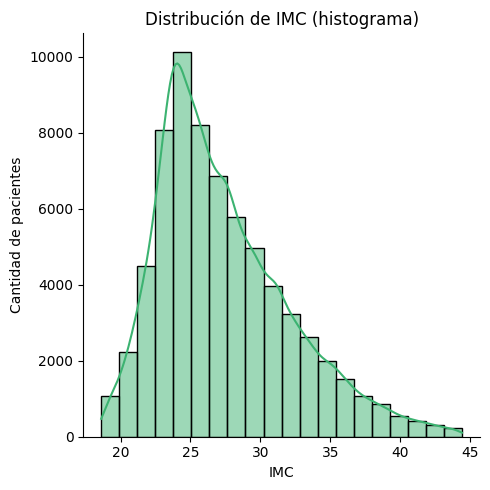

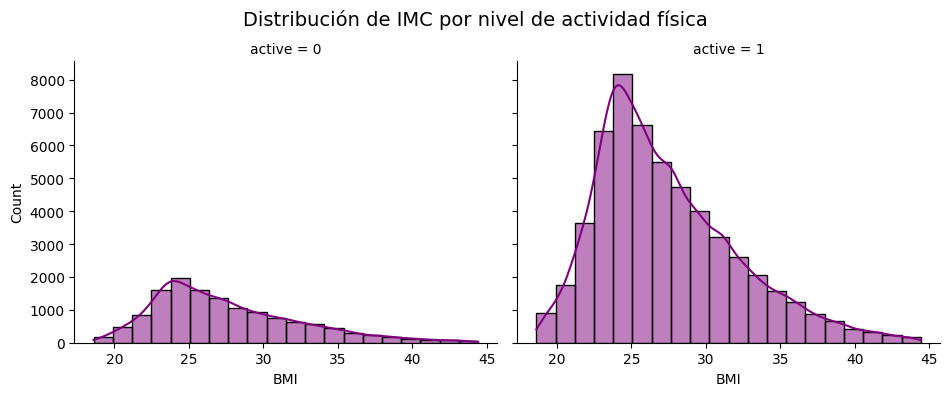

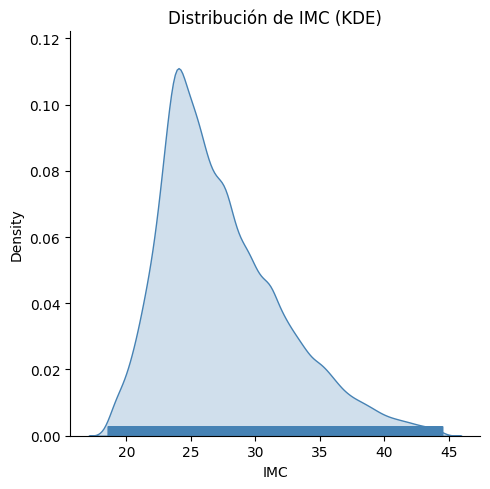

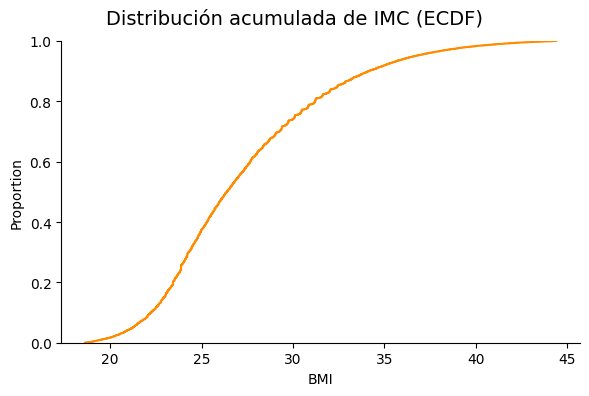

In [9]:
displot_bmi_hist(df)
displot_bmi_hist_active(df)
displot_bmi_kde(df)
displot_bmi_ecdf(df)